# Example if call LibRadTran from the notebook
=======================================================================

- Sylvie Dagoret-Campagne
- update 15 May 2018



Simple test to call on-line libradtran to check if it is working

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os

In [102]:
from scipy.interpolate import interp1d

In [103]:
from librtsimana import *
from libsimulateTranspCTIOScattAbsAer import *

In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
all_transmission=np.loadtxt('transmission.txt')

In [106]:
NBOBS=all_transmission.shape[1]
NBWLBINS=all_transmission.shape[0]

In [107]:
airmasses=np.linspace(1.,2.,NBOBS)
pressure = 782.5
pwv=4.0
aer=0
ozone=300.

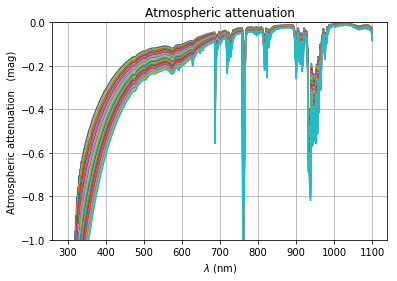

In [108]:
idx=0
for am in airmasses:
    plt.plot(WL,2.5*np.log10(all_transmission[:,idx]))
    idx+=1
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("Atmospheric attenuation   (mag)")
plt.title("Atmospheric attenuation")
plt.ylim(-1.,0.)
plt.grid()

In [109]:
thetitle='Atmospheric attenuation 400-600 nm'

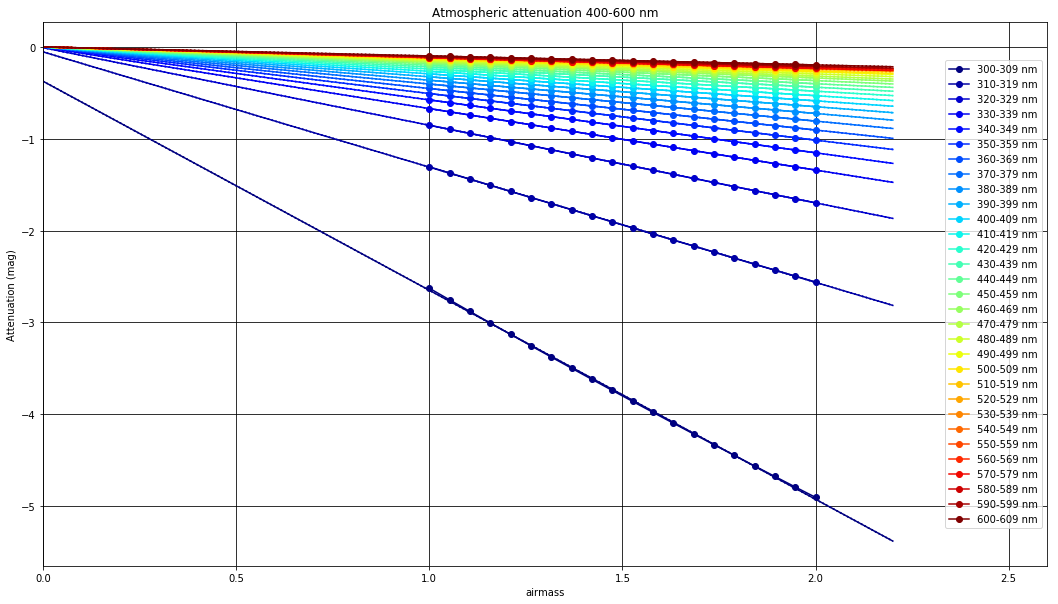

In [110]:
x1,y1,err1=FitAttenuationSmoothBin(airmasses,all_transmission,thetitle,ZMIN=300.,ZMAX=600.,Wwidth=11,Bwidth=10,Mag=True)

In [111]:
thetitle='Atmospheric attenuation 600-1000 nm'

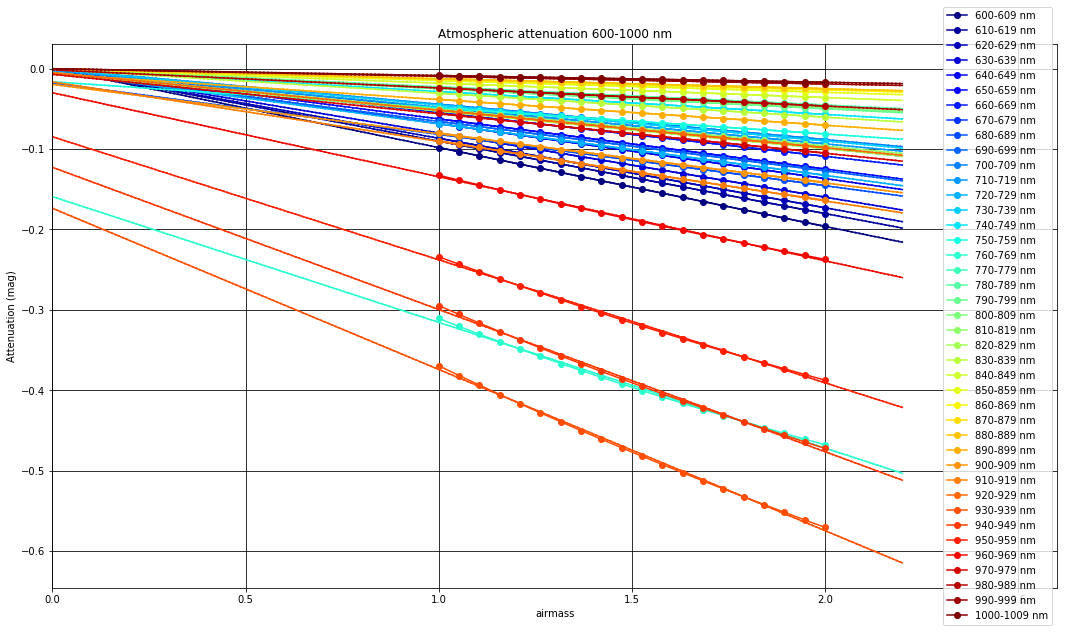

In [112]:
x2,y2,err2=FitAttenuationSmoothBin(airmasses,all_transmission,thetitle,ZMIN=600.,ZMAX=1000.,Wwidth=11,Bwidth=10,Mag=True)

In [113]:
wl=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))
err=np.zeros(len(y))

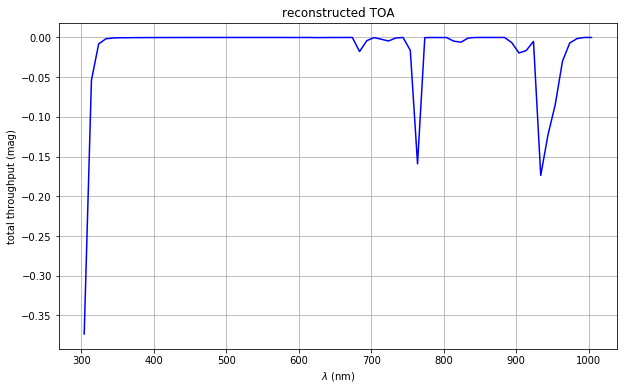

In [114]:
PlotOpticalThroughput(wl,y,err,"reconstructed TOA")

# Multi realisations

In [115]:
NREALIZATIONS=500

In [116]:
SIGMAWL=5.

In [117]:
all_wl,all_y,all_err=GenerateBouguerIntercept(airmasses,all_transmission,sigma_wl=SIGMAWL,nb_realizations=NREALIZATIONS)

librtsimana.py:271: RuntimeWarning: divide by zero encountered in log10
  newY0=2.5*np.log10(Y0)


In [118]:
thetitle='Bouguer error $\sigma(\lambda)$= {} nm, nb. realizations = {}'.format(SIGMAWL,NREALIZATIONS)

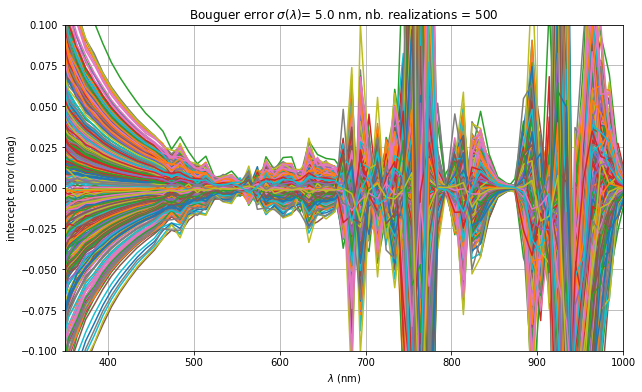

In [119]:
PlotBouguerInterceptError(all_wl,all_y,thetitle)

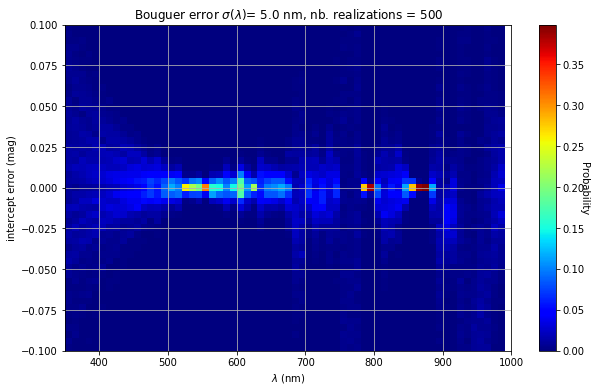

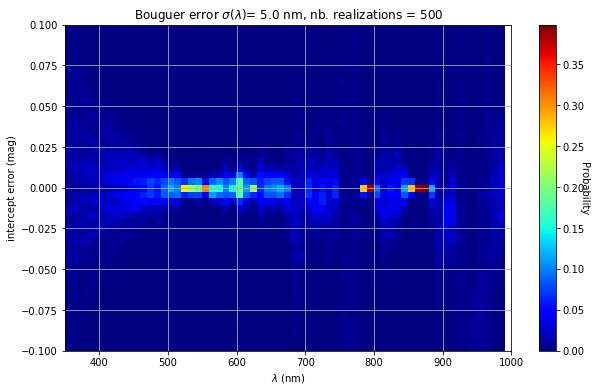

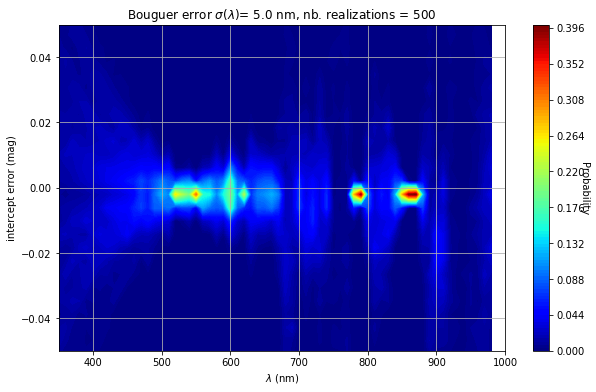

In [120]:
PlotHist2dBouguerInterceptError(all_wl,all_y,thetitle)